## Import modules

In [2]:
# Dataframes
import pandas as pd
import geopandas as gpd

#Graphs

#Surfaces

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns



## What we'll talk about today

Jupyter lab

- combination of markdown and executable code cells
- state preserving (makes iteration easy)

reading 'any' format into a few common datastructures - these are what we interact with during analyses.

- vector

- raster

- graph

## (Geo-)Dataframes

(geographic) tables / vector

objectives:

- import datasets
- understand structure (head, tail, shape, vector types (point, linestring, polygon, multilinestring/polygons, dtypes, crs (projection, reprojecting), data exploration (describe/min/max), plotting (color by column), filtering, new columns)
- query/index e.g. row selection
- merge/join. From pandas to geopandas. Work with dataframe, add geodataframe/ create geodataframe with sensor information

to-do: do I separate the gadm, with geometry as separate file?

tasks for students:

- import new dataset
- create new column, based on existing columns
- find max/min of a certain variable, maybe within a geographic area (admin area)? 
- simple plot with custom cmap?
- filter dataframe

Source: https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/kaart-van-500-meter-bij-500-meter-met-statistieken

Starting with gadm

In [5]:
admin = gpd.read_file('../data/raw_data/gadm41_NLD_2.json')

In [6]:
admin.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,NLD.1.1_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,AaenHunze,NA,NA,Gemeente,Municipality,NA,NL.DR.AH,"MULTIPOLYGON (((6.56990 52.94650, 6.58990 52.9..."
1,NLD.1.2_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Assen,NA,NA,Gemeente,Municipality,NA,NL.DR.AS,"MULTIPOLYGON (((6.64080 53.02570, 6.63920 53.0..."
2,NLD.1.3_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Borger-Odoorn,NA,NA,Gemeente,Municipality,NA,NL.DR.BO,"MULTIPOLYGON (((6.74570 52.87920, 6.73630 52.9..."
3,NLD.1.4_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Coevorden,NA,NA,Gemeente,Municipality,NA,NL.DR.CO,"MULTIPOLYGON (((6.87160 52.65300, 6.86450 52.6..."
4,NLD.1.5_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,DeWolden,NA,NA,Gemeente,Municipality,NA,NL.DR.DW,"MULTIPOLYGON (((6.27320 52.66810, 6.27640 52.6..."


In [7]:
admin.tail()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
350,NLD.14.89_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoetermeer,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZR,"MULTIPOLYGON (((4.42360 52.05130, 4.41620 52.0..."
351,NLD.14.90_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoeterwoude,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZD,"MULTIPOLYGON (((4.55210 52.13850, 4.54780 52.1..."
352,NLD.14.104_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zuidplas,NA,NA,Gemeente,Municipality,NA,NA,"MULTIPOLYGON (((4.56690 52.05880, 4.60930 52.0..."
353,NLD.14.91_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zwijndrecht,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZW,"MULTIPOLYGON (((4.55540 51.83070, 4.56250 51.8..."
354,NLD.14.1_1,NLD,Netherlands,NLD.14_1,ZuidHollandseMeren,NA,ZuidHollandseMeren,NA,NA,Gemeente,Waterbody,NA,NA,"MULTIPOLYGON (((4.15760 51.68240, 4.16620 51.6..."


In [8]:
admin.shape

(355, 14)

In [9]:
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
admin = admin.to_crs(28992)

In [11]:
admin.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

<AxesSubplot:>

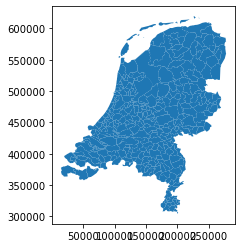

In [12]:
admin.plot()

In [13]:
admin["centroid"] = admin.geometry.centroid

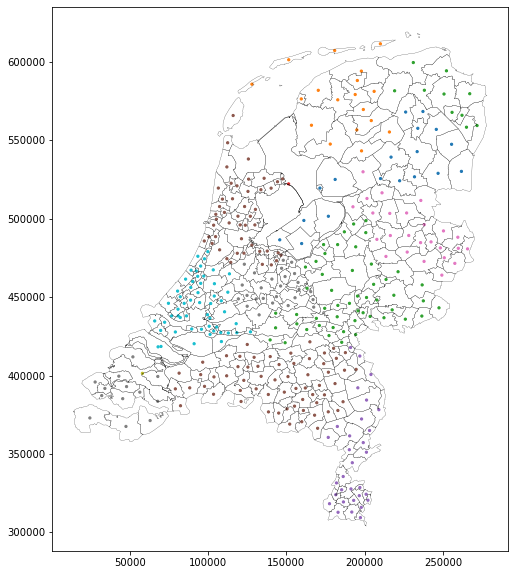

In [58]:
# Plot centroids
ax = admin.set_geometry("centroid").plot('NAME_1', 
                                         markersize=5, 
                                         figsize=(10,10))
# Plot polygons without color filling
admin.plot('NAME_1',
           ax=ax, 
           facecolor="none", 
           edgecolor="k", 
           linewidth=0.2,
);

In [33]:
admin.loc[1]

GID_2                                                NLD.1.2_1
GID_0                                                      NLD
COUNTRY                                            Netherlands
GID_1                                                  NLD.1_1
NAME_1                                                 Drenthe
NL_NAME_1                                                   NA
NAME_2                                                   Assen
VARNAME_2                                                   NA
NL_NAME_2                                                   NA
TYPE_2                                                Gemeente
ENGTYPE_2                                         Municipality
CC_2                                                        NA
HASC_2                                                NL.DR.AS
geometry     (POLYGON ((239107.09609690774 560595.343178744...
centroid          POINT (233827.14692466691 557762.8687103043)
Name: 1, dtype: object

In [24]:
admin.loc[admin.NAME_1 == 'Noord-Holland']

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,centroid
190,NLD.9.1_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Aalsmeer,NA,NA,Gemeente,Municipality,NA,NL.NH.AA,"MULTIPOLYGON (((115789.705 479870.026, 116690....",POINT (112004.387 474548.846)
191,NLD.9.66_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Alkmaar,NA,NA,Gemeente,Municipality,NA,NL.NH.AL,"MULTIPOLYGON (((123988.103 513337.388, 123183....",POINT (115586.648 512786.342)
192,NLD.9.3_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Amstelveen,NA,NA,Gemeente,Municipality,NA,NL.NH.AV,"MULTIPOLYGON (((114787.476 474882.155, 116690....",POINT (118630.186 478020.701)
193,NLD.9.4_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Amsterdam,NA,NA,Gemeente,Municipality,NA,NL.NH.AD,"MULTIPOLYGON (((129959.176 481869.765, 130342....",POINT (121311.987 487284.923)
194,NLD.9.7_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Beemster,NA,NA,Gemeente,Municipality,NA,NL.NH.BM,"MULTIPOLYGON (((117670.855 505736.912, 117768....",POINT (123292.721 507842.356)
195,NLD.9.9_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Bergen,NA,NA,Gemeente,Municipality,NA,NL.NH.BG,"MULTIPOLYGON (((111434.334 521611.780, 112236....",POINT (106537.058 519633.588)
196,NLD.9.10_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Beverwijk,NA,NA,Gemeente,Municipality,NA,NL.NH.BV,"MULTIPOLYGON (((100737.131 501610.656, 101911....",POINT (105293.189 499756.979)
197,NLD.9.11_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Blaricum,NA,NA,Gemeente,Municipality,NA,NL.NH.BC,"MULTIPOLYGON (((148519.310 478906.621, 148819....",POINT (146520.288 476812.016)
198,NLD.9.12_2,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Bloemendaal,NA,NA,Gemeente,Municipality,NA,NL.NH.BL,"MULTIPOLYGON (((97363.103 490677.184, 98335.02...",POINT (100503.268 488509.956)
199,NLD.9.14_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Castricum,NA,NA,Gemeente,Municipality,NA,NL.NH.CA,"MULTIPOLYGON (((112145.936 511724.101, 112443....",POINT (107318.549 507835.529)


<AxesSubplot:>

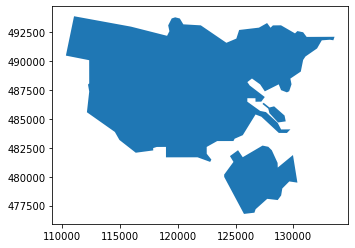

In [25]:
amsterdam = admin.loc[admin.NAME_2 == 'Amsterdam']
amsterdam.plot()

Import Samenmeten

In [30]:
sensors = gpd.read_file('../data/raw_data/samenmeten.json')
sensors.head()

,id_x,name_x,name_thing,codegemeente,knmicode,nh3closecode,nh3regiocode,nh3stadcode,no2closecode,no2regiocode,...,pm10stadcode,pm25closecode,pm25regiocode,pm25stadcode,project,id_y,name_y,gemeentecode,random,geometry
0,25430,loc-name-HLL_hl_device_539,HLL_hl_device_539,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NL10550,NL49703,NL49703,NL49007,Hollandse Luchten,7976,HLL_hl_device_539,None,3,POINT (105078.461 488378.701)
1,25429,loc-name-HLL_hl_device_356,HLL_hl_device_356,479,knmi_06240,NL10633,NL10633,None,NL49546,NL49703,...,NL49007,NL49701,NL49703,NL49007,Hollandse Luchten,7858,HLL_hl_device_356,None,5,POINT (117123.161 496282.980)
2,25391,loc-name-HLL_hl_device_356,HLL_hl_device_356,479,knmi_06240,NL10633,NL10633,None,NL49546,NL49703,...,NL49007,NL49701,NL49703,NL49007,Hollandse Luchten,7858,HLL_hl_device_356,None,1,POINT (117926.306 494607.807)
3,25133,loc-name-HLL_hl_device_356,HLL_hl_device_356,479,knmi_06240,NL10633,NL10633,None,NL49546,NL49703,...,NL49007,NL49701,NL49703,NL49007,Hollandse Luchten,7858,HLL_hl_device_356,None,4,POINT (116869.365 498621.637)
4,25428,loc-name-LUC_354724647886677,LUC_354724647886677,599,knmi_06344,NL10444,NL10444,None,NL10418,NL10437,...,NL01487,NL10418,NL10444,NL01487,Luchtclub,6028,LUC_354724647886677,None,3,POINT (92982.613 435550.661)


In [34]:
sensors.shape

(13725, 24)

<AxesSubplot:>

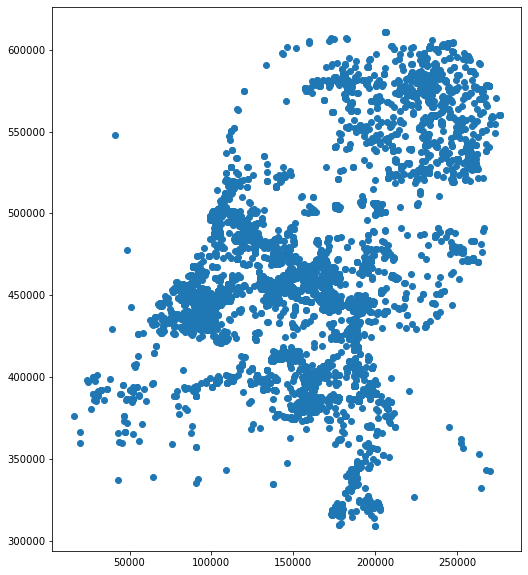

In [60]:
sensors.plot(figsize=(10,10))

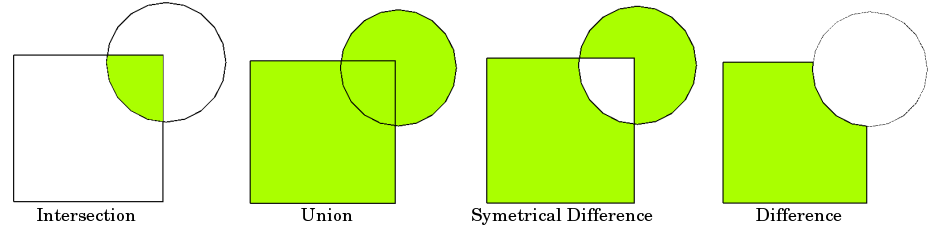

https://geopandas.org/en/stable/docs/user_guide/set_operations.html

In [35]:
intersection = gpd.overlay(sensors, admin, how='intersection')

In [36]:
intersection.head()

,id_x,name_x,name_thing,codegemeente,knmicode,nh3closecode,nh3regiocode,nh3stadcode,no2closecode,no2regiocode,...,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,centroid,geometry
0,25430,loc-name-HLL_hl_device_539,HLL_hl_device_539,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (105078.461 488378.701)
1,25382,loc-name-HLL_hl_device_458,HLL_hl_device_458,392,knmi_06240,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (105178.706 484816.982)
2,25379,loc-name-GLBPB_105-040,GLBPB_105-040,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (103167.404 487953.318)
3,25176,loc-name-HLL_hl_device_537,HLL_hl_device_537,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (102961.957 487844.207)
4,25125,loc-name-HLL_hl_device_537,HLL_hl_device_537,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (102961.957 487844.207)


In [86]:
admin_counts = intersection.groupby('NAME_2').size().reset_index(name='sensor_count')

In [87]:
admin_counts.sort_values(by='sensor_count', ascending=False)

,NAME_2,sensor_count
240,Rotterdam,2233
193,Nijmegen,957
162,Leidschendam-Voorburg,716
291,Venray,491
63,DeBilt,388
...,...,...
141,Huizen,1
294,Vlieland,1
127,Hendrik-Ido-Ambacht,1
106,Grave,1


In [88]:
admin_counts[admin_counts['sensor_count'] == admin_counts['sensor_count'].max()]


,NAME_2,sensor_count
240,Rotterdam,2233


In [89]:
admin_counts[admin_counts['sensor_count'] == admin_counts['sensor_count'].min()]


,NAME_2,sensor_count
10,Alphen-Chaam,1
21,Baarle-Nassau,1
25,Beek,1
29,Bergeijk,1
34,Bernheze,1
58,Cranendonck,1
61,Dalfsen,1
73,Doesburg,1
82,Edam-Volendam,1
106,Grave,1


In [90]:
admin_counts['sensor_count'].mean()

40.57566765578635

What is the min?
What is the mean?

What is the municipality with the most sensors?
Which municipality is closest to the mean?

join on NAME_1 -> then plot by count?

Also for exercise, should this be 

In [91]:
# Merge the DataFrames using the 'Key' column
merged_df = pd.merge(admin, admin_counts, on='NAME_2', how='outer')

# 'how' parameter specifies the type of merge:
# - 'inner' (default): Keeps only the common values in both DataFrames
# - 'left': Keeps all values from the left DataFrame and only common values from the right DataFrame
# - 'right': Keeps all values from the right DataFrame and only common values from the left DataFrame
# - 'outer': Keeps all values from both DataFrames, filling missing values with NaN

In [92]:
merged_df

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,centroid,sensor_count
0,NLD.1.1_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,AaenHunze,NA,NA,Gemeente,Municipality,NA,NL.DR.AH,"MULTIPOLYGON (((234495.023 551702.305, 235801....",POINT (245622.559 557075.237),38.0
1,NLD.1.2_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Assen,NA,NA,Gemeente,Municipality,NA,NL.DR.AS,"MULTIPOLYGON (((239107.096 560595.343, 239004....",POINT (233827.147 557762.869),32.0
2,NLD.1.3_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Borger-Odoorn,NA,NA,Gemeente,Municipality,NA,NL.DR.BO,"MULTIPOLYGON (((246451.501 544422.207, 245743....",POINT (255381.222 547561.354),29.0
3,NLD.1.4_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Coevorden,NA,NA,Gemeente,Municipality,NA,NL.DR.CO,"MULTIPOLYGON (((255443.223 519422.409, 254969....",POINT (246762.103 529038.492),41.0
4,NLD.1.5_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,DeWolden,NA,NA,Gemeente,Municipality,NA,NL.DR.DW,"MULTIPOLYGON (((214933.132 520438.735, 215142....",POINT (222237.379 524277.954),22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,NLD.14.89_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoetermeer,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZR,"MULTIPOLYGON (((88904.526 451881.687, 88406.19...",POINT (93569.119 452878.450),51.0
351,NLD.14.90_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoeterwoude,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZD,"MULTIPOLYGON (((97829.907 461473.887, 97529.75...",POINT (95297.212 458829.996),2.0
352,NLD.14.104_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zuidplas,NA,NA,Gemeente,Municipality,NA,NA,"MULTIPOLYGON (((98742.870 452595.358, 101658.4...",POINT (101660.762 445950.806),54.0
353,NLD.14.91_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zwijndrecht,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZW,"MULTIPOLYGON (((97663.745 427227.815, 98163.35...",POINT (101278.978 426265.004),3.0


<AxesSubplot:>

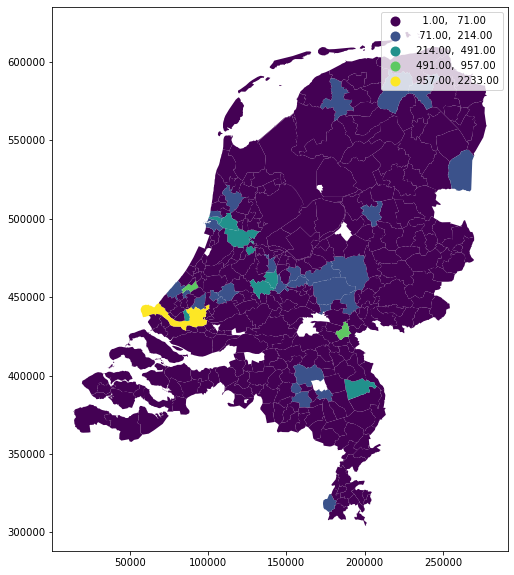

In [95]:
merged_df.plot('sensor_count',
               legend=True,
               figsize=(10,10), 
               scheme='NaturalBreaks')

## Tasks:

- filter gadm dataset (Zuid-holland)
- import cbs dataset
- check crs
- 
- 

## To be removed

In [5]:
cbs = gpd.read_file('data/raw_data/cbs_vk500_2022_v1.gpkg')

In [6]:
cbs = gpd.read_file('data/raw_data/2023-cbs_vk500_2022_v1.zip')

In [7]:
cbs.head()

,crs28992res500m,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,...,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry
0,E2260N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((226000.000 619000.000, 226000...."
1,E2265N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((226500.000 619500.000, 227000...."
2,E2270N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((227000.000 619500.000, 227500...."
3,E2275N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((227500.000 619500.000, 228000...."
4,E2280N6190,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((228000.000 619500.000, 228500...."


In [8]:
cbs.tail()

,crs28992res500m,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,percentage_geb_nederland_herkomst_nederland,...,aantal_meergezins_woningen,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_niet_bewoonde_woningen,gemiddelde_woz_waarde_woning,aantal_personen_met_uitkering_onder_aowlft,omgevingsadressendichtheid,stedelijkheid,geometry
151103,E1995N3070,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((199500.000 307500.000, 200000...."
151104,E1905N3065,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((190500.000 307000.000, 191000...."
151105,E1910N3065,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,"MULTIPOLYGON (((191000.000 307000.000, 191500...."
151106,E1920N3065,15,5,5,-99997,-99997,-99997,5,-99997,90,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,3,5,"MULTIPOLYGON (((192000.000 307000.000, 192500...."
151107,E1925N3065,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,-99997,...,-99997,-99997,-99997,-99997,-99997,-99997,-99997,5,5,"MULTIPOLYGON (((192500.000 307000.000, 193000...."


In [9]:
cbs.shape

(151108, 39)

<AxesSubplot:>

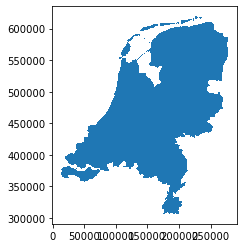

In [10]:
cbs.plot()

In [14]:
cbs["centroid"] = cbs.geometry.centroid

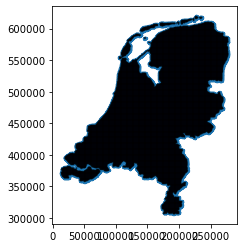

In [15]:
# Plot centroids
ax = cbs.set_geometry("centroid").plot(markersize=5)
# Plot polygons without color filling
cbs.plot(
    ax=ax, facecolor="none", edgecolor="k", linewidth=0.2
);

## Surfaces (raster)

objectives:

- difference between vector/ raster
- load raster
- understand structure (shape, bands, crs)
